<a href="https://colab.research.google.com/github/mas1996oud/Gote_Robot/blob/main/Gote_Robot_using_Bard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt

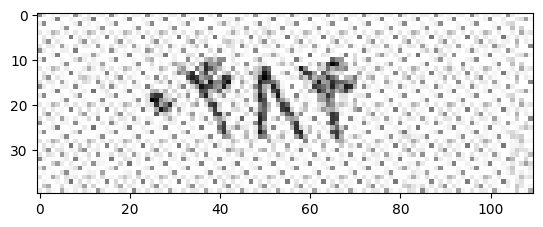

In [2]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/0484.jpg',0)

plt.imshow(img, 'gray')

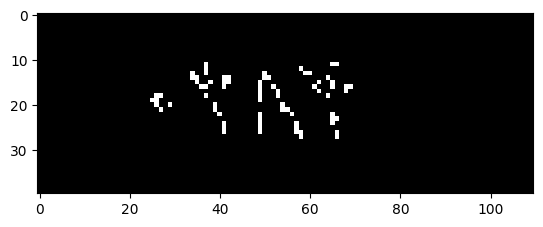

In [3]:
# Threshold the image to identify the checkerboard pattern
thresh = cv2.threshold(img, 180, 255,cv2.THRESH_BINARY_INV)[1]

plt.imshow(thresh, 'gray')

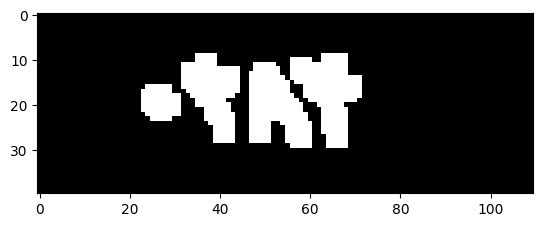

In [4]:
# Create a mask of the checkerboard pattern
mask = cv2.dilate(thresh, None, iterations=2)

plt.imshow(mask, 'gray')

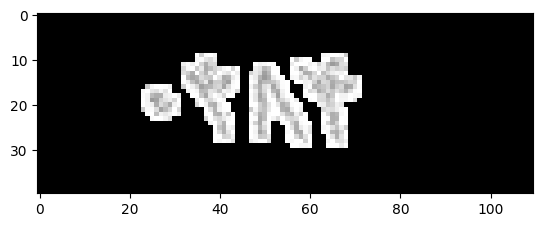

In [5]:
# Apply the mask to the image
result = cv2.bitwise_and(img,img, mask=mask)

plt.imshow(result, 'gray')

In [6]:
contours, hierarchy = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntlen = len( contours)
cntlen

3

In [ ]:
bnot = result

In [ ]:
dict={}
cnt = 0

for i in range (cntlen) :
  x,y,w,h = cv2.boundingRect(contrs[i])
  dict[cnt] = (x,y,w,h)

  if h < 9 :
    bnot[x:x+w, y:y+h] = 0
    dict.pop(cnt)
    continue

  elif w > 90 :
    w = int(w/2)
    dict[cnt] = (x,y,w,h)
    cnt += 1

    x += w
    w *= 2
    dict[cnt] = (x,y,w,h)
    continue


  else :
    cnt += 1



len (dict)

0

(25, 21)

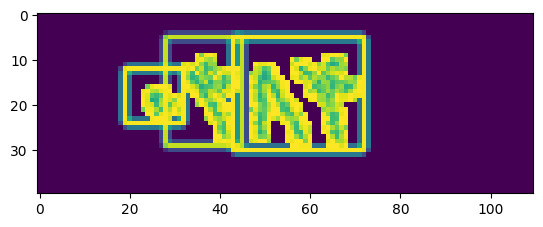

In [ ]:
test = result

x,y,w,h = cv2.boundingRect(contours[1])

x=x-4
y=y-4
cv2.rectangle(test,(x,y),(x+w+4,y+h+4),(255,255,255),1,cv2.LINE_AA)
plt.imshow(test)

w,h